In [1]:
from optosim.simulation.optical_photon_display import OpticalPhotonDisplay
from optosim.settings import CONFIG_DIR

import matplotlib.pyplot as plt
from IPython.display import clear_output

### Event display for individual photons

OpticalPhoton::Reading configuration from file: /data/xenon/cfuselli/software/OptoSim/optosim/config/config_nev10k_nph1k-25k.json
'set_no_scatter' set to False
'set_experimental_scatter_model' set to True
Event number: 0
x = [1.5 0.  0.1] t = [-0.17374412  0.10037934 -0.97966166] medium = 0
x = [1.48226489 0.01024633 0.        ] t = [-0.10594154  0.06120691 -0.99248683] medium = 1
x = [ 0.76708332  0.42343701 -6.7       ] t = [-0.04964118  0.02867981 -0.99835526] medium = 3
Event number: 1
x = [1.5 0.  0.1] t = [-0.8543263   0.20122742  0.47920152] medium = 0
x = [-0.4610934   0.46191457  1.2       ] t = [-0.24409323  0.05749355  0.96804596] medium = 3
Event number: 2
x = [1.5 0.  0.1] t = [-0.4581011   0.60020006  0.65567009] medium = 0
x = [0.73145616 1.00693942 1.2       ] t = [-0.13088603  0.17148573  0.97645353] medium = 3
Event number: 3
x = [1.5 0.  0.1] t = [0.80869771 0.25598996 0.52960094] medium = 0
x = [3.15673417 0.52443243 1.18496408] t = [0.80869771 0.25598996 0.52960094

/data/xenon/cfuselli/software/OptoSim/optosim/simulation/optical_photon.py:446: RuntimeWarning: invalid value encountered in sqrt
  refracted_dir = (n1 / n2) * (in_dir + dot_product * nvec) - np.sqrt(


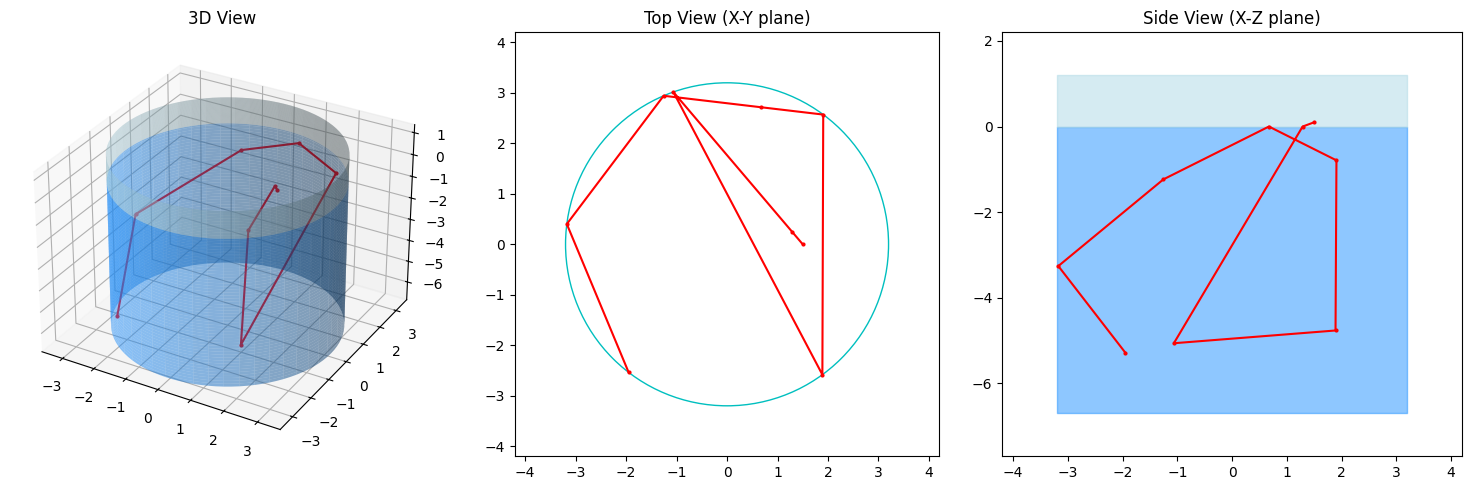

Quit the event display......


In [5]:
# Initialize the display class

config_file = CONFIG_DIR + '/config_nev10k_nph1k-25k.json'

photon = OpticalPhotonDisplay(config=config_file)

# switch scattering on/off
photon.set_no_scattering(False)
# switch modeling on/off
photon.set_experimental_scatter_model(True)

iselect = -1

# set random seed
for i in range(10000):
    print('Event number:',i)
    photon.set_random_seed(12345+i)

    #
    # generate a photon
    #
    photon.generate_photon([1.5, 0, 0.1])  # Generate a photon at the center of the detector
    #
    # propogate the photon through the detetor
    #
    photon.propagate()

    
    if (iselect == -1) or (i == iselect):
        #
        # show the event
        #
        
        if photon.get_number_of_reflections() > 5:
            # photon.plot_3d_view_animation()
        
            photon.plot()

            response = input("Press Enter to continue to the next event or 'q' to quit...")
            if (response.lower() == 'q') or (iselect != -1):
                print("Quit the event display......")
                break
    
            clear_output(wait=True)
